In [1]:
!pip install python-dotenv~=1.0.1
!pip install tavily-python==0.3.3
!pip install duckduckgo_search==5.3.1b1
!pip install beautifulsoup4==4.12.3
!pip install openai==1.30.1
!pip install langgraph==0.0.53
# !pip install langchain_core==0.2.0
# !pip install langchain_openai==0.1.7
# !pip install langchain-community==0.2.0
# !pip install langchain==0.2.0


!pip install langchain_core
!pip install langchain_openai
!pip install langchain-community
!pip install langchain

!pip install aiosqlite==0.20.0
!pip install pygments==2.17.2
!pip install graphviz
!pip install gradio==4.31.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.13.3
    Uninstalling beautifulsoup4-4.13.3:
      Successfully uninstalled beautifulsoup4-4.13.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 66.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
class Constants():
  OPENAI_API_KEY= ""
  TAVILY_API_KEY= ""

In [ ]:
!pip uninstall langchain langchain-openai pydantic -y
!pip install langchain langchain-openai "pydantic<2"

In [11]:
# !sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!sudo apt-get install graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 1 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,670 kB of

In [12]:
#!pip install "pydantic==1.10.13"
!pip install pygraphviz==1.13

  Using cached pygraphviz-1.13.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.13-cp311-cp311-linux_x86_64.whl size=169542 sha256=055144fec5ae03e22fce4ac96744208917e0344fc5ca944721846483c9e6d77a
  Stored in directory: /root/.cache/pip/wheels/99/87/82/379ff97012dbfa9ff79c620b9aa7ebe1c7ddae966d7776f06f
Successfully built pygraphviz


In [29]:
from dotenv import load_dotenv

_ = load_dotenv()

from langgraph.graph import StateGraph, END
from typing_extensions import TypedDict, Annotated, List
import operator
from langgraph.checkpoint.sqlite import SqliteSaver
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, AIMessage, ChatMessage
from langgraph.checkpoint.memory import MemorySaver
memory = SqliteSaver.from_conn_string(":memory:")
memory = MemorySaver()
class AgentState(TypedDict):
    task: str
    plan: str
    draft: str
    critique: str
    content: List[str]
    revision_number: int
    max_revisions: int

from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="gpt-4-turbo", temperature=0, api_key=Constants.OPENAI_API_KEY)

PLAN_PROMPT = """You are an expert writer tasked with writing a high level outline of an essay. \
Write such an outline for the user provided topic. Give an outline of the essay along with any relevant notes \
or instructions for the sections."""

WRITER_PROMPT = """You are an essay assistant tasked with writing excellent 5-paragraph essays.\
Generate the best essay possible for the user's request and the initial outline. \
If the user provides critique, respond with a revised version of your previous attempts. \
Utilize all the information below as needed:

------

{content}"""

REFLECTION_PROMPT = """You are a teacher grading an essay submission. \
Generate critique and recommendations for the user's submission. \
Provide detailed recommendations, including requests for length, depth, style, etc."""

RESEARCH_PLAN_PROMPT = """You are a researcher charged with providing information that can \
be used when writing the following essay. Generate a list of search queries that will gather \
any relevant information. Only generate 3 queries max."""

RESEARCH_CRITIQUE_PROMPT = """You are a researcher charged with providing information that can \
be used when making any requested revisions (as outlined below). \
Generate a list of search queries that will gather any relevant information. Only generate 3 queries max."""

from pydantic import BaseModel

class Queries(BaseModel):
    queries: List[str]

from tavily import TavilyClient
import os
tavily = TavilyClient(api_key=Constants.TAVILY_API_KEY)

def plan_node(state: AgentState):
    messages = [
        SystemMessage(content=PLAN_PROMPT),
        HumanMessage(content=state['task'])
    ]
    response = model.invoke(messages)
    return {"plan": response.content}

def research_plan_node(state: AgentState):
    queries = model.with_structured_output(Queries).invoke([
        SystemMessage(content=RESEARCH_PLAN_PROMPT),
        HumanMessage(content=state['task'])
    ])
    content = state['content'] or []
    for q in queries.queries:
        response = tavily.search(query=q, max_results=2)
        for r in response['results']:
            content.append(r['content'])
    return {"content": content}

def generation_node(state: AgentState):
    content = "\n\n".join(state['content'] or [])
    user_message = HumanMessage(
        content=f"{state['task']}\n\nHere is my plan:\n\n{state['plan']}")
    messages = [
        SystemMessage(
            content=WRITER_PROMPT.format(content=content)
        ),
        user_message
        ]
    response = model.invoke(messages)
    return {
        "draft": response.content,
        "revision_number": state.get("revision_number", 1) + 1
    }

def reflection_node(state: AgentState):
    messages = [
        SystemMessage(content=REFLECTION_PROMPT),
        HumanMessage(content=state['draft'])
    ]
    response = model.invoke(messages)
    return {"critique": response.content}

def research_critique_node(state: AgentState):
    queries = model.with_structured_output(Queries).invoke([
        SystemMessage(content=RESEARCH_CRITIQUE_PROMPT),
        HumanMessage(content=state['critique'])
    ])
    content = state['content'] or []
    for q in queries.queries:
        response = tavily.search(query=q, max_results=2)
        for r in response['results']:
            content.append(r['content'])
    return {"content": content}

def should_continue(state):
    if state["revision_number"] > state["max_revisions"]:
        return END
    return "reflect"

builder = StateGraph(AgentState)

builder.add_node("planner", plan_node)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)
builder.add_node("research_plan", research_plan_node)
builder.add_node("research_critique", research_critique_node)

builder.set_entry_point("planner")

builder.add_conditional_edges(
    "generate",
    should_continue,
    {END: END, "reflect": "reflect"}
)

builder.add_edge("planner", "research_plan")
builder.add_edge("research_plan", "generate")

builder.add_edge("reflect", "research_critique")
builder.add_edge("research_critique", "generate")

graph = builder.compile(checkpointer=memory)

In [30]:
# !pip install pygraphviz==1.13

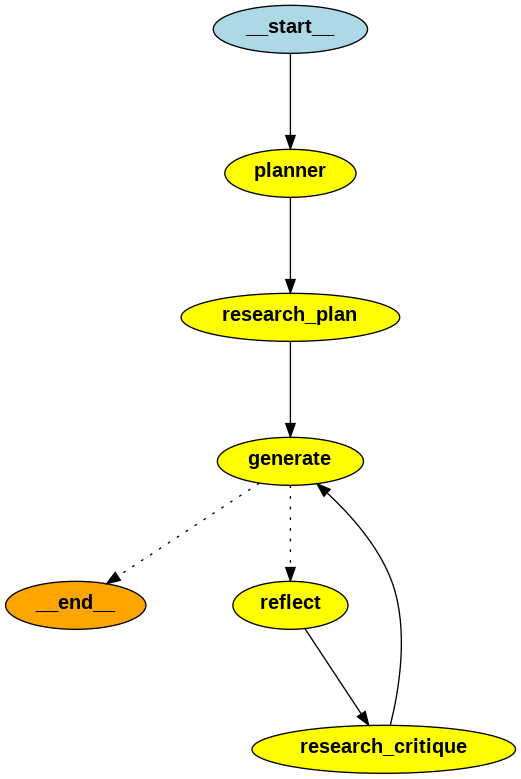

In [31]:
from IPython.display import Image
# from typing_extensions import TypedDict
Image(graph.get_graph().draw_png())

In [ ]:
thread = {"configurable": {"thread_id": "1"}}
for s in graph.stream({
    'task': "what is the difference between langchain and langsmith",
    "max_revisions": 2,
    "revision_number": 1,
}, thread):
    print(s)

{'planner': {'plan': '### Essay Outline: Comparing LangChain and LangSmith\n\n#### I. Introduction\n   A. Introduce the topic of AI language models and their increasing role in technology.\n   B. Define LangChain and LangSmith, highlighting their relevance in the AI field.\n   C. Thesis Statement: Although both LangChain and LangSmith are tools designed to enhance the capabilities of language models, they differ significantly in their functionalities, applications, and user interfaces.\n\n#### II. Overview of LangChain\n   A. Definition and primary purpose of LangChain.\n   B. Brief history and development.\n   C. Core features and capabilities.\n      1. Integration with other AI models\n      2. Customization options\n      3. Specific use cases and examples\n   D. Advantages of using LangChain.\n   E. Potential limitations or drawbacks.\n\n#### III. Overview of LangSmith\n   A. Definition and primary purpose of LangSmith.\n   B. Brief history and development.\n   C. Core features an

In [32]:
import warnings
warnings.filterwarnings("ignore", message=".*TqdmWarning.*")
from dotenv import load_dotenv

_ = load_dotenv()

from langgraph.graph import StateGraph, END
from typing_extensions import TypedDict, Annotated, List
import operator
from langgraph.checkpoint.sqlite import SqliteSaver
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, AIMessage, ChatMessage
from langchain_openai import ChatOpenAI
from langchain_core.pydantic_v1 import BaseModel
from tavily import TavilyClient
import os
import sqlite3
import gradio as gr
import time

In [33]:
class AgentState(TypedDict):
    task: str
    lnode: str
    plan: str
    draft: str
    critique: str
    content: List[str]
    queries: List[str]
    revision_number: int
    max_revisions: int
    count: Annotated[int, operator.add]


class Queries(BaseModel):
    queries: List[str]

class ewriter():
    def __init__(self):
        self.model = ChatOpenAI(model="gpt-3.5-turbo", temperature=0, openai_api_key=Constants.OPENAI_API_KEY)
        self.PLAN_PROMPT = ("You are an expert writer tasked with writing a high level outline of a short 3 paragraph essay. "
                            "Write such an outline for the user provided topic. Give the three main headers of an outline of "
                             "the essay along with any relevant notes or instructions for the sections. ")
        self.WRITER_PROMPT = ("You are an essay assistant tasked with writing excellent 3 paragraph essays. "
                              "Generate the best essay possible for the user's request and the initial outline. "
                              "If the user provides critique, respond with a revised version of your previous attempts. "
                              "Utilize all the information below as needed: \n"
                              "------\n"
                              "{content}")
        self.RESEARCH_PLAN_PROMPT = ("You are a researcher charged with providing information that can "
                                     "be used when writing the following essay. Generate a list of search "
                                     "queries that will gather "
                                     "any relevant information. Only generate 3 queries max.")
        self.REFLECTION_PROMPT = ("You are a teacher grading an 3 paragraph essay submission. "
                                  "Generate critique and recommendations for the user's submission. "
                                  "Provide detailed recommendations, including requests for length, depth, style, etc.")
        self.RESEARCH_CRITIQUE_PROMPT = ("You are a researcher charged with providing information that can "
                                         "be used when making any requested revisions (as outlined below). "
                                         "Generate a list of search queries that will gather any relevant information. "
                                         "Only generate 2 queries max.")
        self.tavily = TavilyClient(api_key= Constants.TAVILY_API_KEY)
        builder = StateGraph(AgentState)
        builder.add_node("planner", self.plan_node)
        builder.add_node("research_plan", self.research_plan_node)
        builder.add_node("generate", self.generation_node)
        builder.add_node("reflect", self.reflection_node)
        builder.add_node("research_critique", self.research_critique_node)
        builder.set_entry_point("planner")
        builder.add_conditional_edges(
            "generate",
            self.should_continue,
            {END: END, "reflect": "reflect"}
        )
        builder.add_edge("planner", "research_plan")
        builder.add_edge("research_plan", "generate")
        builder.add_edge("reflect", "research_critique")
        builder.add_edge("research_critique", "generate")
        memory = SqliteSaver(conn=sqlite3.connect(":memory:", check_same_thread=False))
        self.graph = builder.compile(
            checkpointer=memory,
            interrupt_after=['planner', 'generate', 'reflect', 'research_plan', 'research_critique']
        )


    def plan_node(self, state: AgentState):
        messages = [
            SystemMessage(content=self.PLAN_PROMPT),
            HumanMessage(content=state['task'])
        ]
        response = self.model.invoke(messages)
        return {"plan": response.content,
               "lnode": "planner",
                "count": 1,
               }
    def research_plan_node(self, state: AgentState):
        queries = self.model.with_structured_output(Queries).invoke([
            SystemMessage(content=self.RESEARCH_PLAN_PROMPT),
            HumanMessage(content=state['task'])
        ])
        content = state['content'] or []  # add to content
        for q in queries.queries:
            response = self.tavily.search(query=q, max_results=2)
            for r in response['results']:
                content.append(r['content'])
        return {"content": content,
                "queries": queries.queries,
               "lnode": "research_plan",
                "count": 1,
               }
    def generation_node(self, state: AgentState):
        content = "\n\n".join(state['content'] or [])
        user_message = HumanMessage(
            content=f"{state['task']}\n\nHere is my plan:\n\n{state['plan']}")
        messages = [
            SystemMessage(
                content=self.WRITER_PROMPT.format(content=content)
            ),
            user_message
            ]
        response = self.model.invoke(messages)
        return {
            "draft": response.content,
            "revision_number": state.get("revision_number", 1) + 1,
            "lnode": "generate",
            "count": 1,
        }
    def reflection_node(self, state: AgentState):
        messages = [
            SystemMessage(content=self.REFLECTION_PROMPT),
            HumanMessage(content=state['draft'])
        ]
        response = self.model.invoke(messages)
        return {"critique": response.content,
               "lnode": "reflect",
                "count": 1,
        }
    def research_critique_node(self, state: AgentState):
        queries = self.model.with_structured_output(Queries).invoke([
            SystemMessage(content=self.RESEARCH_CRITIQUE_PROMPT),
            HumanMessage(content=state['critique'])
        ])
        content = state['content'] or []
        for q in queries.queries:
            response = self.tavily.search(query=q, max_results=2)
            for r in response['results']:
                content.append(r['content'])
        return {"content": content,
               "lnode": "research_critique",
                "count": 1,
        }
    def should_continue(self, state):
        if state["revision_number"] > state["max_revisions"]:
            return END
        return "reflect"


class writer_gui( ):
    def __init__(self, graph, share=False):
        self.graph = graph
        self.share = share
        self.partial_message = ""
        self.response = {}
        self.max_iterations = 10
        self.iterations = []
        self.threads = []
        self.thread_id = -1
        self.thread = {"configurable": {"thread_id": str(self.thread_id)}}
        #self.sdisps = {} #global
        self.demo = self.create_interface()

    def run_agent(self, start,topic,stop_after):
        #global partial_message, thread_id,thread
        #global response, max_iterations, iterations, threads
        if start:
            self.iterations.append(0)
            config = {'task': topic,"max_revisions": 2,"revision_number": 0,
                      'lnode': "", 'planner': "no plan", 'draft': "no draft", 'critique': "no critique",
                      'content': ["no content",], 'queries': "no queries", 'count':0}
            self.thread_id += 1  # new agent, new thread
            self.threads.append(self.thread_id)
        else:
            config = None
        self.thread = {"configurable": {"thread_id": str(self.thread_id)}}
        while self.iterations[self.thread_id] < self.max_iterations:
            self.response = self.graph.invoke(config, self.thread)
            self.iterations[self.thread_id] += 1
            self.partial_message += str(self.response)
            self.partial_message += f"\n------------------\n\n"
            ## fix
            lnode,nnode,_,rev,acount = self.get_disp_state()
            yield self.partial_message,lnode,nnode,self.thread_id,rev,acount
            config = None #need
            #print(f"run_agent:{lnode}")
            if not nnode:
                #print("Hit the end")
                return
            if lnode in stop_after:
                #print(f"stopping due to stop_after {lnode}")
                return
            else:
                #print(f"Not stopping on lnode {lnode}")
                pass
        return

    def get_disp_state(self,):
        current_state = self.graph.get_state(self.thread)
        lnode = current_state.values["lnode"]
        acount = current_state.values["count"]
        rev = current_state.values["revision_number"]
        nnode = current_state.next
        #print  (lnode,nnode,self.thread_id,rev,acount)
        return lnode,nnode,self.thread_id,rev,acount

    def get_state(self,key):
        current_values = self.graph.get_state(self.thread)
        if key in current_values.values:
            lnode,nnode,self.thread_id,rev,astep = self.get_disp_state()
            new_label = f"last_node: {lnode}, thread_id: {self.thread_id}, rev: {rev}, step: {astep}"
            return gr.update(label=new_label, value=current_values.values[key])
        else:
            return ""

    def get_content(self,):
        current_values = self.graph.get_state(self.thread)
        if "content" in current_values.values:
            content = current_values.values["content"]
            lnode,nnode,thread_id,rev,astep = self.get_disp_state()
            new_label = f"last_node: {lnode}, thread_id: {self.thread_id}, rev: {rev}, step: {astep}"
            return gr.update(label=new_label, value="\n\n".join(item for item in content) + "\n\n")
        else:
            return ""

    def update_hist_pd(self,):
        #print("update_hist_pd")
        hist = []
        # curiously, this generator returns the latest first
        for state in self.graph.get_state_history(self.thread):
            if state.metadata['step'] < 1:
                continue
            thread_ts = state.config['configurable']['thread_ts']
            tid = state.config['configurable']['thread_id']
            count = state.values['count']
            lnode = state.values['lnode']
            rev = state.values['revision_number']
            nnode = state.next
            st = f"{tid}:{count}:{lnode}:{nnode}:{rev}:{thread_ts}"
            hist.append(st)
        return gr.Dropdown(label="update_state from: thread:count:last_node:next_node:rev:thread_ts",
                           choices=hist, value=hist[0],interactive=True)

    def find_config(self,thread_ts):
        for state in self.graph.get_state_history(self.thread):
            config = state.config
            if config['configurable']['thread_ts'] == thread_ts:
                return config
        return(None)

    def copy_state(self,hist_str):
        ''' result of selecting an old state from the step pulldown. Note does not change thread.
             This copies an old state to a new current state.
        '''
        thread_ts = hist_str.split(":")[-1]
        #print(f"copy_state from {thread_ts}")
        config = self.find_config(thread_ts)
        #print(config)
        state = self.graph.get_state(config)
        self.graph.update_state(self.thread, state.values, as_node=state.values['lnode'])
        new_state = self.graph.get_state(self.thread)  #should now match
        new_thread_ts = new_state.config['configurable']['thread_ts']
        tid = new_state.config['configurable']['thread_id']
        count = new_state.values['count']
        lnode = new_state.values['lnode']
        rev = new_state.values['revision_number']
        nnode = new_state.next
        return lnode,nnode,new_thread_ts,rev,count

    def update_thread_pd(self,):
        #print("update_thread_pd")
        return gr.Dropdown(label="choose thread", choices=threads, value=self.thread_id,interactive=True)

    def switch_thread(self,new_thread_id):
        #print(f"switch_thread{new_thread_id}")
        self.thread = {"configurable": {"thread_id": str(new_thread_id)}}
        self.thread_id = new_thread_id
        return

    def modify_state(self,key,asnode,new_state):
        ''' gets the current state, modifes a single value in the state identified by key, and updates state with it.
        note that this will create a new 'current state' node. If you do this multiple times with different keys, it will create
        one for each update. Note also that it doesn't resume after the update
        '''
        current_values = self.graph.get_state(self.thread)
        current_values.values[key] = new_state
        self.graph.update_state(self.thread, current_values.values,as_node=asnode)
        return


    def create_interface(self):
        with gr.Blocks(theme=gr.themes.Default(spacing_size='sm',text_size="sm")) as demo:

            def updt_disp():
                ''' general update display on state change '''
                current_state = self.graph.get_state(self.thread)
                hist = []
                # curiously, this generator returns the latest first
                for state in self.graph.get_state_history(self.thread):
                    if state.metadata['step'] < 1:  #ignore early states
                        continue
                    s_thread_ts = state.config['configurable']['thread_ts']
                    s_tid = state.config['configurable']['thread_id']
                    s_count = state.values['count']
                    s_lnode = state.values['lnode']
                    s_rev = state.values['revision_number']
                    s_nnode = state.next
                    st = f"{s_tid}:{s_count}:{s_lnode}:{s_nnode}:{s_rev}:{s_thread_ts}"
                    hist.append(st)
                if not current_state.metadata: #handle init call
                    return{}
                else:
                    return {
                        topic_bx : current_state.values["task"],
                        lnode_bx : current_state.values["lnode"],
                        count_bx : current_state.values["count"],
                        revision_bx : current_state.values["revision_number"],
                        nnode_bx : current_state.next,
                        threadid_bx : self.thread_id,
                        thread_pd : gr.Dropdown(label="choose thread", choices=self.threads, value=self.thread_id,interactive=True),
                        step_pd : gr.Dropdown(label="update_state from: thread:count:last_node:next_node:rev:thread_ts",
                               choices=hist, value=hist[0],interactive=True),
                    }
            def get_snapshots():
                new_label = f"thread_id: {self.thread_id}, Summary of snapshots"
                sstate = ""
                for state in self.graph.get_state_history(self.thread):
                    for key in ['plan', 'draft', 'critique']:
                        if key in state.values:
                            state.values[key] = state.values[key][:80] + "..."
                    if 'content' in state.values:
                        for i in range(len(state.values['content'])):
                            state.values['content'][i] = state.values['content'][i][:20] + '...'
                    if 'writes' in state.metadata:
                        state.metadata['writes'] = "not shown"
                    sstate += str(state) + "\n\n"
                return gr.update(label=new_label, value=sstate)

            def vary_btn(stat):
                #print(f"vary_btn{stat}")
                return(gr.update(variant=stat))

            with gr.Tab("Agent"):
                with gr.Row():
                    topic_bx = gr.Textbox(label="Essay Topic", value="Pizza Shop")
                    gen_btn = gr.Button("Generate Essay", scale=0,min_width=80, variant='primary')
                    cont_btn = gr.Button("Continue Essay", scale=0,min_width=80)
                with gr.Row():
                    lnode_bx = gr.Textbox(label="last node", min_width=100)
                    nnode_bx = gr.Textbox(label="next node", min_width=100)
                    threadid_bx = gr.Textbox(label="Thread", scale=0, min_width=80)
                    revision_bx = gr.Textbox(label="Draft Rev", scale=0, min_width=80)
                    count_bx = gr.Textbox(label="count", scale=0, min_width=80)
                with gr.Accordion("Manage Agent", open=False):
                    checks = list(self.graph.nodes.keys())
                    checks.remove('__start__')
                    stop_after = gr.CheckboxGroup(checks,label="Interrupt After State", value=checks, scale=0, min_width=400)
                    with gr.Row():
                        thread_pd = gr.Dropdown(choices=self.threads,interactive=True, label="select thread", min_width=120, scale=0)
                        step_pd = gr.Dropdown(choices=['N/A'],interactive=True, label="select step", min_width=160, scale=1)
                live = gr.Textbox(label="Live Agent Output", lines=5, max_lines=5)

                # actions
                sdisps =[topic_bx,lnode_bx,nnode_bx,threadid_bx,revision_bx,count_bx,step_pd,thread_pd]
                thread_pd.input(self.switch_thread, [thread_pd], None).then(
                                fn=updt_disp, inputs=None, outputs=sdisps)
                step_pd.input(self.copy_state,[step_pd],None).then(
                              fn=updt_disp, inputs=None, outputs=sdisps)
                gen_btn.click(vary_btn,gr.Number("secondary", visible=False), gen_btn).then(
                              fn=self.run_agent, inputs=[gr.Number(True, visible=False),topic_bx,stop_after], outputs=[live],show_progress=True).then(
                              fn=updt_disp, inputs=None, outputs=sdisps).then(
                              vary_btn,gr.Number("primary", visible=False), gen_btn).then(
                              vary_btn,gr.Number("primary", visible=False), cont_btn)
                cont_btn.click(vary_btn,gr.Number("secondary", visible=False), cont_btn).then(
                               fn=self.run_agent, inputs=[gr.Number(False, visible=False),topic_bx,stop_after],
                               outputs=[live]).then(
                               fn=updt_disp, inputs=None, outputs=sdisps).then(
                               vary_btn,gr.Number("primary", visible=False), cont_btn)

            with gr.Tab("Plan"):
                with gr.Row():
                    refresh_btn = gr.Button("Refresh")
                    modify_btn = gr.Button("Modify")
                plan = gr.Textbox(label="Plan", lines=10, interactive=True)
                refresh_btn.click(fn=self.get_state, inputs=gr.Number("plan", visible=False), outputs=plan)
                modify_btn.click(fn=self.modify_state, inputs=[gr.Number("plan", visible=False),
                                                          gr.Number("planner", visible=False), plan],outputs=None).then(
                                 fn=updt_disp, inputs=None, outputs=sdisps)
            with gr.Tab("Research Content"):
                refresh_btn = gr.Button("Refresh")
                content_bx = gr.Textbox(label="content", lines=10)
                refresh_btn.click(fn=self.get_content, inputs=None, outputs=content_bx)
            with gr.Tab("Draft"):
                with gr.Row():
                    refresh_btn = gr.Button("Refresh")
                    modify_btn = gr.Button("Modify")
                draft_bx = gr.Textbox(label="draft", lines=10, interactive=True)
                refresh_btn.click(fn=self.get_state, inputs=gr.Number("draft", visible=False), outputs=draft_bx)
                modify_btn.click(fn=self.modify_state, inputs=[gr.Number("draft", visible=False),
                                                          gr.Number("generate", visible=False), draft_bx], outputs=None).then(
                                fn=updt_disp, inputs=None, outputs=sdisps)
            with gr.Tab("Critique"):
                with gr.Row():
                    refresh_btn = gr.Button("Refresh")
                    modify_btn = gr.Button("Modify")
                critique_bx = gr.Textbox(label="Critique", lines=10, interactive=True)
                refresh_btn.click(fn=self.get_state, inputs=gr.Number("critique", visible=False), outputs=critique_bx)
                modify_btn.click(fn=self.modify_state, inputs=[gr.Number("critique", visible=False),
                                                          gr.Number("reflect", visible=False),
                                                          critique_bx], outputs=None).then(
                                fn=updt_disp, inputs=None, outputs=sdisps)
            with gr.Tab("StateSnapShots"):
                with gr.Row():
                    refresh_btn = gr.Button("Refresh")
                snapshots = gr.Textbox(label="State Snapshots Summaries")
                refresh_btn.click(fn=get_snapshots, inputs=None, outputs=snapshots)
        return demo

    def launch(self, share=None):
        if port := os.getenv("PORT1"):
            self.demo.launch(share=True, server_port=int(port), server_name="0.0.0.0")
        else:
            self.demo.launch(share=self.share)


In [38]:
import warnings
warnings.filterwarnings("ignore")

MultiAgent = ewriter()
app = writer_gui(MultiAgent.graph)
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>